# Importing libraries

In [5]:
!pip install --upgrade scikit-learn
!pip uninstall scikit-learn
!pip install scikit-learn


Found existing installation: scikit-learn 1.3.1
Uninstalling scikit-learn-1.3.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.3.1
  Using cached scikit_learn-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)


In [1]:
#This imports the Pandas library and aliases it as 'pd.'
#Pandas is used for data manipulation and analysis, particularly for handling data in tabular form as DataFrames.
import pandas as pd
# NumPy is used for numerical and array operations, making it an essential library for numerical computing in Python.
import numpy as np
#Seaborn is a data visualization library built on top of Matplotlib.
#It provides a high-level interface for creating informative and attractive statistical graphics.
import seaborn as sns
# module provides various time-related functions and can be used for measuring the execution time of code.
import time
#imports the scikit-learn library, which is a powerful library for machine learning in Python.
#It includes various machine learning algorithms and tools for data preprocessing, model selection, and evaluation.
import sklearn
# Matplotlib is a popular library for creating static, animated, or interactive visualizations in Python.
import matplotlib.pyplot as plt
#imports the RandomForestClassifier class from scikit-learn, which is an ensemble machine learning algorithm based on decision trees.
from sklearn.ensemble import RandomForestClassifier
# imports the LabelEncoder class from scikit-learn, which is used for encoding categorical labels into numerical values.
from sklearn.preprocessing import LabelEncoder
# import various functions and classes from scikit-learn's metrics module for evaluating machine learning models
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
#imports the train_test_split function from scikit-learn, which is used to split a dataset into training and testing subsets.
from sklearn.model_selection import train_test_split
#imports the StandardScaler class from scikit-learn, which is used for standardizing features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
#imports the DecisionTreeClassifier class from scikit-learn, which is a decision tree-based machine learning algorithm.
from sklearn.tree import DecisionTreeClassifier
#imports the GaussianNB class from scikit-learn, which is a Gaussian Naive Bayes classifier.
from sklearn.naive_bayes import GaussianNB

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

# Loading and Checking the dataset

In [2]:
df_train = pd.read_csv('/content/training-set.csv')
df_test = pd.read_csv('/content/testing-set.csv')


In [3]:
print("Length of training set: ", len(df_train))
print("Length of testing set: ", len(df_test))

Length of training set:  175341
Length of testing set:  82332


In [4]:
df = pd.concat([df_train, df_test])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

In [5]:
df.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


In [6]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


## Checking for duplicates

In [7]:
df.duplicated().sum()

0

There is no duplicate record.

## Checking for missing values

In [8]:
df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

## Checking the balance between benign and attack data

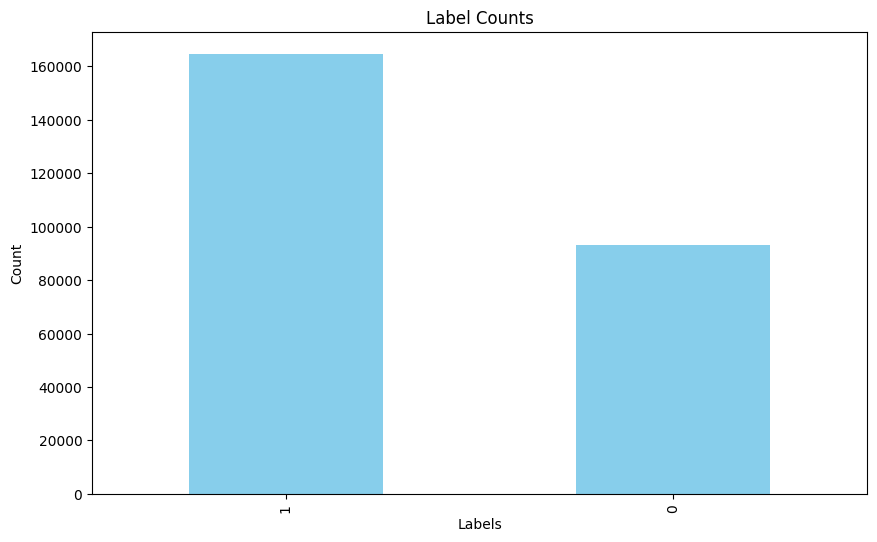

In [9]:
df['label'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Label Counts')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.show()


In [10]:
df['label'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

# Feature engineering

In [11]:
df = df.drop(columns=['id', 'attack_cat'])

## Encoding categorical features using LabelEncoder


In [12]:
df_cat = df.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])

Index(['proto', 'service', 'state'], dtype='object')


In [13]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0


## Data Correlation
Removing highly correlated features.

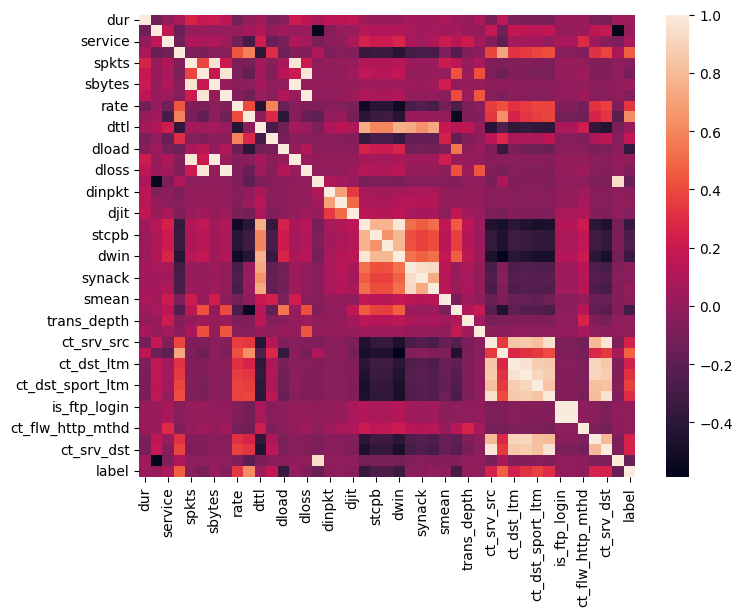

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr())
plt.show()

In [15]:
columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.98:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

sbytes sloss 0.9957715772406667
dbytes dloss 0.996711133831455
swin dwin 0.9804584289136496
is_ftp_login ct_ftp_cmd 0.9988554882935726


In [16]:
df = df.drop(columns=correlated_vars)

## Splitting training and testing sets

In [17]:
X = df.drop(columns=['label'])
feature_list = list(X.columns)
X = np.array(X)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 180371
Testing set: 77302


## Scaling
Scaling all features using StandardScaler.

In [19]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Supervised ML Model training

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

models = {}
models['Decision Tree Classifier'] = DecisionTreeClassifier()
models['Random Forest Classifier'] = RandomForestClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()

In [21]:
train_score, accuracy, precision, recall, training_time, y_pred = {}, {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time()
    models[key].fit(X_train, y_train)
    training_time[key] = time.time() - start_time

    y_pred[key] = models[key].predict(X_test)

    train_score[key] = models[key].score(X_train, y_train)
    accuracy[key] = models[key].score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key])
    recall[key] = recall_score(y_test, y_pred[key])

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Define your Random Forest Classifier model
rfc = RandomForestClassifier()
models['Random Forest Classifier'] = rfc

# Train the Random Forest Classifier
start_time = time.time()
rfc.fit(X_train, y_train)
training_time['Random Forest Classifier'] = time.time() - start_time

# Make predictions on the test set
y_pred['Random Forest Classifier'] = rfc.predict(X_test)

# Calculate scores
train_score['Random Forest Classifier'] = rfc.score(X_train, y_train)
accuracy['Random Forest Classifier'] = rfc.score(X_test, y_test)
precision['Random Forest Classifier'] = precision_score(y_test, y_pred['Random Forest Classifier'])
recall['Random Forest Classifier'] = recall_score(y_test, y_pred['Random Forest Classifier'])


## Models comparison

In [23]:
df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()

In [24]:
df_models

,Training score,Accuracy,Precision,Recall,Training time
Decision Tree Classifier,0.997771,0.936431,0.950467,0.950160,4.437204
Random Forest Classifier,0.997771,0.950842,0.964741,0.958187,55.217230
Gaussian Naive Bayes,0.835755,0.835257,0.841133,0.915403,0.166958


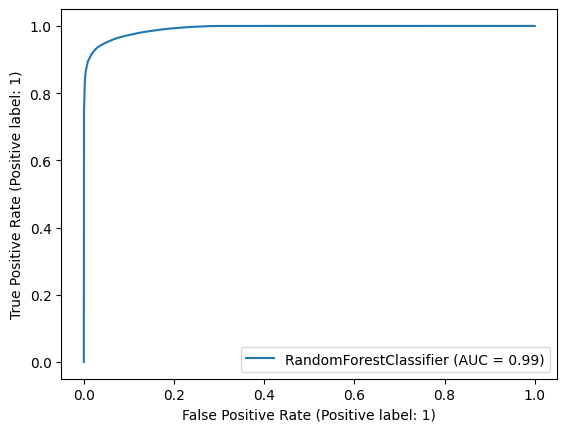

In [25]:
display = RocCurveDisplay.from_estimator(models['Random Forest Classifier'], X_test, y_test)
plt.show()

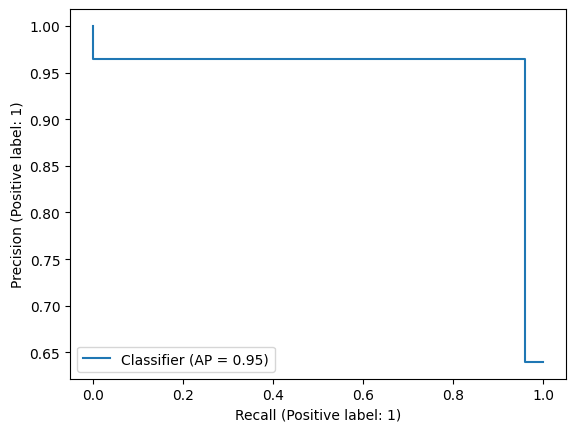

In [26]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred['Random Forest Classifier'])

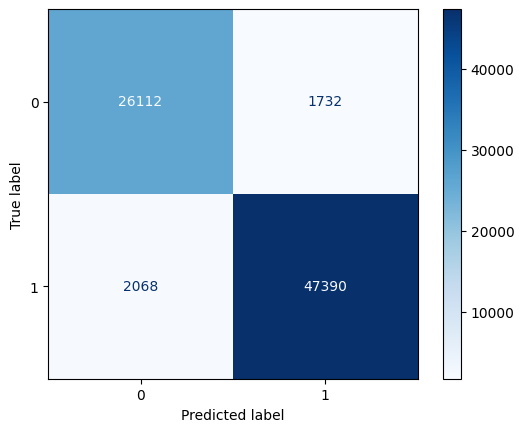

In [27]:
cm = confusion_matrix(y_test, y_pred['Random Forest Classifier'], labels=models['Random Forest Classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models['Random Forest Classifier'].classes_)
disp.plot(cmap='Blues')
plt.show()

#Neural Network Model Classification

In [28]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle
# Data Preprocessing
# Encoding categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['proto', 'service', 'state']
for col in categorical_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    df_test[col] = label_encoder.fit_transform(df_test[col])

#CNN model building and training

In [29]:
# Shuffle and split the data
train_data = shuffle(df_train, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(columns=['attack_cat', 'label']), df_train['label'], test_size=0.2, random_state=42)
X_test, y_test = df_test.drop(columns=['attack_cat', 'label']), df_test['label']

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build and train CNN model
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
4384/4384 [==============================] - 23s 5ms/step - loss: 0.1047 - accuracy: 0.9572 - val_loss: 0.0864 - val_accuracy: 0.9665
Epoch 2/10
4384/4384 [==============================] - 24s 5ms/step - loss: 0.0714 - accuracy: 0.9696 - val_loss: 0.0664 - val_accuracy: 0.9713
Epoch 3/10
4384/4384 [==============================] - 21s 5ms/step - loss: 0.0626 - accuracy: 0.9729 - val_loss: 0.0589 - val_accuracy: 0.9742
Epoch 4/10
4384/4384 [==============================] - 24s 6ms/step - loss: 0.0588 - accuracy: 0.9744 - val_loss: 0.0542 - val_accuracy: 0.9760
Epoch 5/10
4384/4384 [==============================] - 20s 5ms/step - loss: 0.0561 - accuracy: 0.9755 - val_loss: 0.0546 - val_accuracy: 0.9770
Epoch 6/10
4384/4384 [==============================] - 21s 5ms/step - loss: 0.0547 - accuracy: 0.9752 - val_loss: 0.0538 - val_accuracy: 0.9760
Epoch 7/10
4384/4384 [==============================] - 23s 5ms/step - loss: 0.0531 - accuracy: 0.9762 - val_loss: 0.0560 - val_ac

#CNN model testing

In [30]:
# Evaluate CNN model
y_pred_cnn = model_cnn.predict(X_test)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print("CNN Accuracy:", accuracy_cnn)
print(classification_report(y_test, y_pred_cnn))

2573/2573 [==============================] - 6s 2ms/step
CNN Accuracy: 0.5414541126172083
              precision    recall  f1-score   support

           0       0.49      0.69      0.57     37000
           1       0.62      0.42      0.50     45332

    accuracy                           0.54     82332
   macro avg       0.56      0.56      0.54     82332
weighted avg       0.56      0.54      0.54     82332



#RNN model building and training

In [31]:
# Build and train RNN model
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
4384/4384 [==============================] - 97s 22ms/step - loss: 0.1999 - accuracy: 0.9228 - val_loss: 0.1340 - val_accuracy: 0.9534
Epoch 2/10
4384/4384 [==============================] - 95s 22ms/step - loss: 0.1257 - accuracy: 0.9554 - val_loss: 0.1111 - val_accuracy: 0.9579
Epoch 3/10
4384/4384 [==============================] - 97s 22ms/step - loss: 0.1020 - accuracy: 0.9627 - val_loss: 0.0879 - val_accuracy: 0.9655
Epoch 4/10
4384/4384 [==============================] - 95s 22ms/step - loss: 0.0856 - accuracy: 0.9677 - val_loss: 0.0902 - val_accuracy: 0.9650
Epoch 5/10
4384/4384 [==============================] - 95s 22ms/step - loss: 0.0787 - accuracy: 0.9690 - val_loss: 0.0713 - val_accuracy: 0.9701
Epoch 6/10
4384/4384 [==============================] - 95s 22ms/step - loss: 0.0720 - accuracy: 0.9705 - val_loss: 0.0721 - val_accuracy: 0.9703
Epoch 7/10
4384/4384 [==============================] - 100s 23ms/step - loss: 0.0695 - accuracy: 0.9718 - val_loss: 0.0706 

#RNN model evaluation

In [32]:
# Evaluate RNN model
y_pred_rnn = model_rnn.predict(X_test)
y_pred_rnn = (y_pred_rnn > 0.5).astype(int)
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print("RNN Accuracy:", accuracy_rnn)
print(classification_report(y_test, y_pred_rnn))

2573/2573 [==============================] - 16s 6ms/step
RNN Accuracy: 0.5256400913375116
              precision    recall  f1-score   support

           0       0.48      0.63      0.54     37000
           1       0.59      0.44      0.51     45332

    accuracy                           0.53     82332
   macro avg       0.54      0.54      0.52     82332
weighted avg       0.54      0.53      0.52     82332



#Confusion matrix

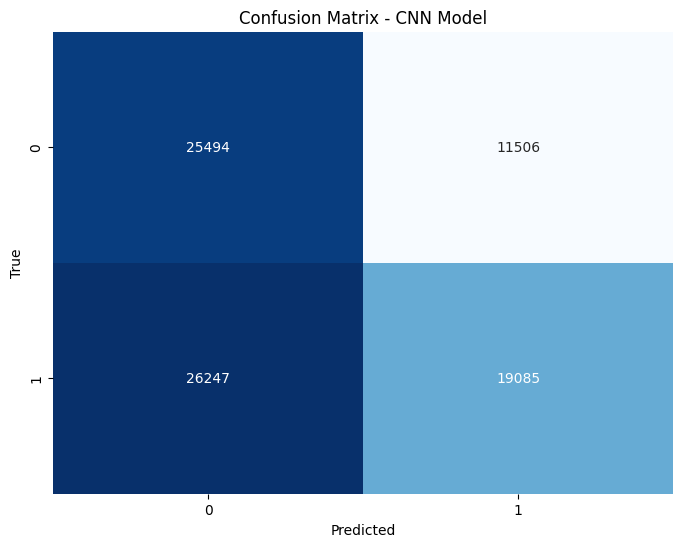

In [33]:
from sklearn.metrics import confusion_matrix

cm_cnn = confusion_matrix(y_test, y_pred_cnn)




plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - CNN Model')
plt.show()

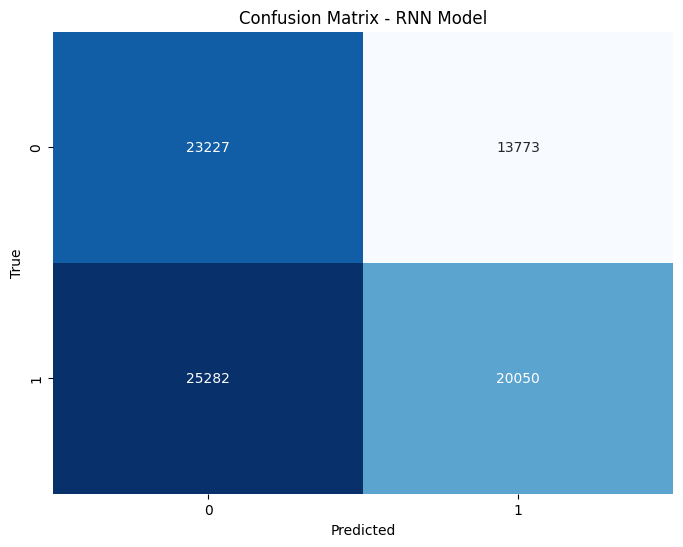

In [34]:
cm_rnn = confusion_matrix(y_test, y_pred_rnn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - RNN Model')
plt.show()
